# sprint0: Global

In [1]:
import numpy as np
np.random.seed(22521178)

In [2]:
# CONST
RANDOM_STATE = 22521178
INTERVAL_FIRST = 0
INTERVAL_SECOND = 1
NUMBER = 10**6
MEAN = 0
STD = 0.03

In [3]:
# libraries
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error

In [4]:
def fixRandomState(fixed_state):
  np.random.seed(fixed_state)

# sprint1: Build Model-API class

In [5]:
class API:
  def __init__(self):
    pass

  def generateData(self, NUMBER: int):
    __size = int(1 * NUMBER)
    if(NUMBER == 10):
      __size = int(0.6 * NUMBER)
    inputs = np.linspace(INTERVAL_FIRST, INTERVAL_SECOND, NUMBER - __size)
    inputs = np.append(inputs, np.random.uniform(size = __size))
    outputs = np.sin(1 + inputs**2)  + np.random.normal(MEAN, STD, NUMBER)
    return inputs, outputs

  def generateDatas(self, NUMBER: int) -> np:
    datas = []
    for i in range(3):
      __data = self.generateData(NUMBER)
      __data2 = self.generateData(NUMBER)
      # datas.append(train_test_split(__data[0], __data[1], test_size = 0.5, random_state = RANDOM_STATE))
      datas.append([__data[0], __data2[0], __data[1], __data2[1]])
    return np.array(datas)

  def fitprop(self, x: np, layers: list, y: np) -> list:
    z = x.copy().reshape(-1, 1)
    for i in range(len(layers)-1):
      layers[i] = layers[i].fit(z)
      z = layers[i].transform(z)
    layers[-1] = layers[-1].fit(z, y)
    return layers

  def forward(self, x: np, layers: list) -> np:
    z = x.copy().reshape(-1, 1)
    for i in range(len(layers)-1):
      # layers[i] = layers[i].fit(z)
      z = layers[i].transform(z)
    # layers[-1] = layers[-1].fit(z)
    return layers[-1].predict(z)

  def getMertric(self, x: np, layers: list, y: np) -> np:
    y_pred = self.forward(x, layers)
    mse = mean_squared_error(y_pred=y_pred, y_true=y)
    return round(mse, 6)

  def myplot(self, xlabel = "", ylabel = "", title = "", legend = True, fontsize = 10) -> None:
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.title(title, fontsize = fontsize)
    plt.grid()
    if(legend): plt.legend()

# sprint2: Experiment 1

- class 1

In [6]:
class Experiment:
  def __init__(self, __N: int) -> None:
    self.N = __N
    self.api = API()
    self.datas = self.api.generateDatas(self.N)

    self.x_function = np.linspace(INTERVAL_FIRST, INTERVAL_SECOND, NUMBER)
    self.y_function = np.sin(1 + self.x_function**2)

  def fitModels(self) -> None:
    self.models = defaultdict(list)
    for deg in range(1, 10):
      poly = PolynomialFeatures(deg, include_bias = False)

      for i in range(3):
        x_in, y_in = self.datas[i][0], self.datas[i][2]
        reg = LinearRegression()
        layers = [poly, reg]
        layers = self.api.fitprop(x_in, layers, y_in)
        self.models[deg].append(layers)

  def myplot(self, xlabel = "", ylabel = "", title = "", legend = True, fontsize = 10) -> None:
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(fontsize = fontsize)
    plt.yticks(fontsize = fontsize)
    plt.title(title, fontsize = fontsize)
    plt.grid()
    if(legend): plt.legend()


- create version

In [7]:
exp = Experiment(10)

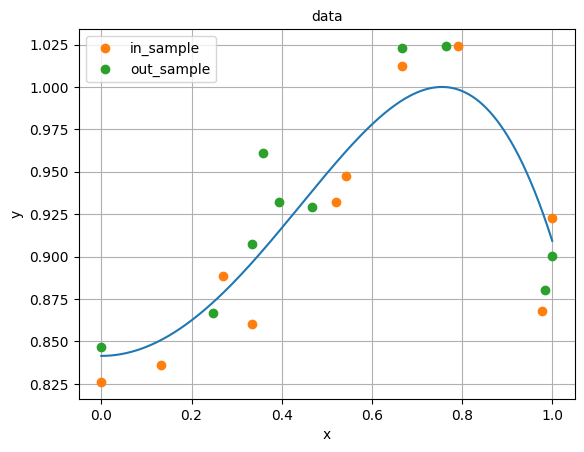

In [8]:
### plot datas[0]
x_in, x_out, y_in, y_out = exp.datas[0]
plt.plot(exp.x_function, exp.y_function)
plt.plot(x_in, y_in, 'o', label = 'in_sample')
plt.plot(x_out, y_out, 'o', label = 'out_sample')

exp.myplot('x', 'y', 'data')
plt.show()

In [9]:
### fit and show models
exp.fitModels()
exp.models

defaultdict(list,
            {1: [[PolynomialFeatures(degree=1, include_bias=False),
               LinearRegression()],
              [PolynomialFeatures(degree=1, include_bias=False),
               LinearRegression()],
              [PolynomialFeatures(degree=1, include_bias=False),
               LinearRegression()]],
             2: [[PolynomialFeatures(include_bias=False), LinearRegression()],
              [PolynomialFeatures(include_bias=False), LinearRegression()],
              [PolynomialFeatures(include_bias=False), LinearRegression()]],
             3: [[PolynomialFeatures(degree=3, include_bias=False),
               LinearRegression()],
              [PolynomialFeatures(degree=3, include_bias=False),
               LinearRegression()],
              [PolynomialFeatures(degree=3, include_bias=False),
               LinearRegression()]],
             4: [[PolynomialFeatures(degree=4, include_bias=False),
               LinearRegression()],
              [PolynomialFeature

- class 2

In [10]:
class Experiment(Experiment):
  def __init__(self, __N: int, exp = None, astype = True):
    if(astype):
      # convert: mapping attributes from
      for att in vars(exp).keys():
        setattr(self, att, getattr(exp, att))
      return

    super().__init__(__N)

  def plotFigures(self):
    cnt = 0
    plt.figure(figsize = (16, 20))
    for deg in range(1, 10):
      cnt += 1
      plt.subplot(3, 3, cnt)
      x = self.x_function
      plt.plot(x, self.y_function, label = 'target_function')

      for i in range(3):
        y = self.api.forward(x, self.models[deg][i])
        plt.plot(x, y, label = 'D{}'.format(i+1))

      self.myplot('x', 'y', title = 'degree is {}'.format(deg))
    plt.show()


- create version

In [11]:
exp = Experiment(10, exp)

task: plot figures: 


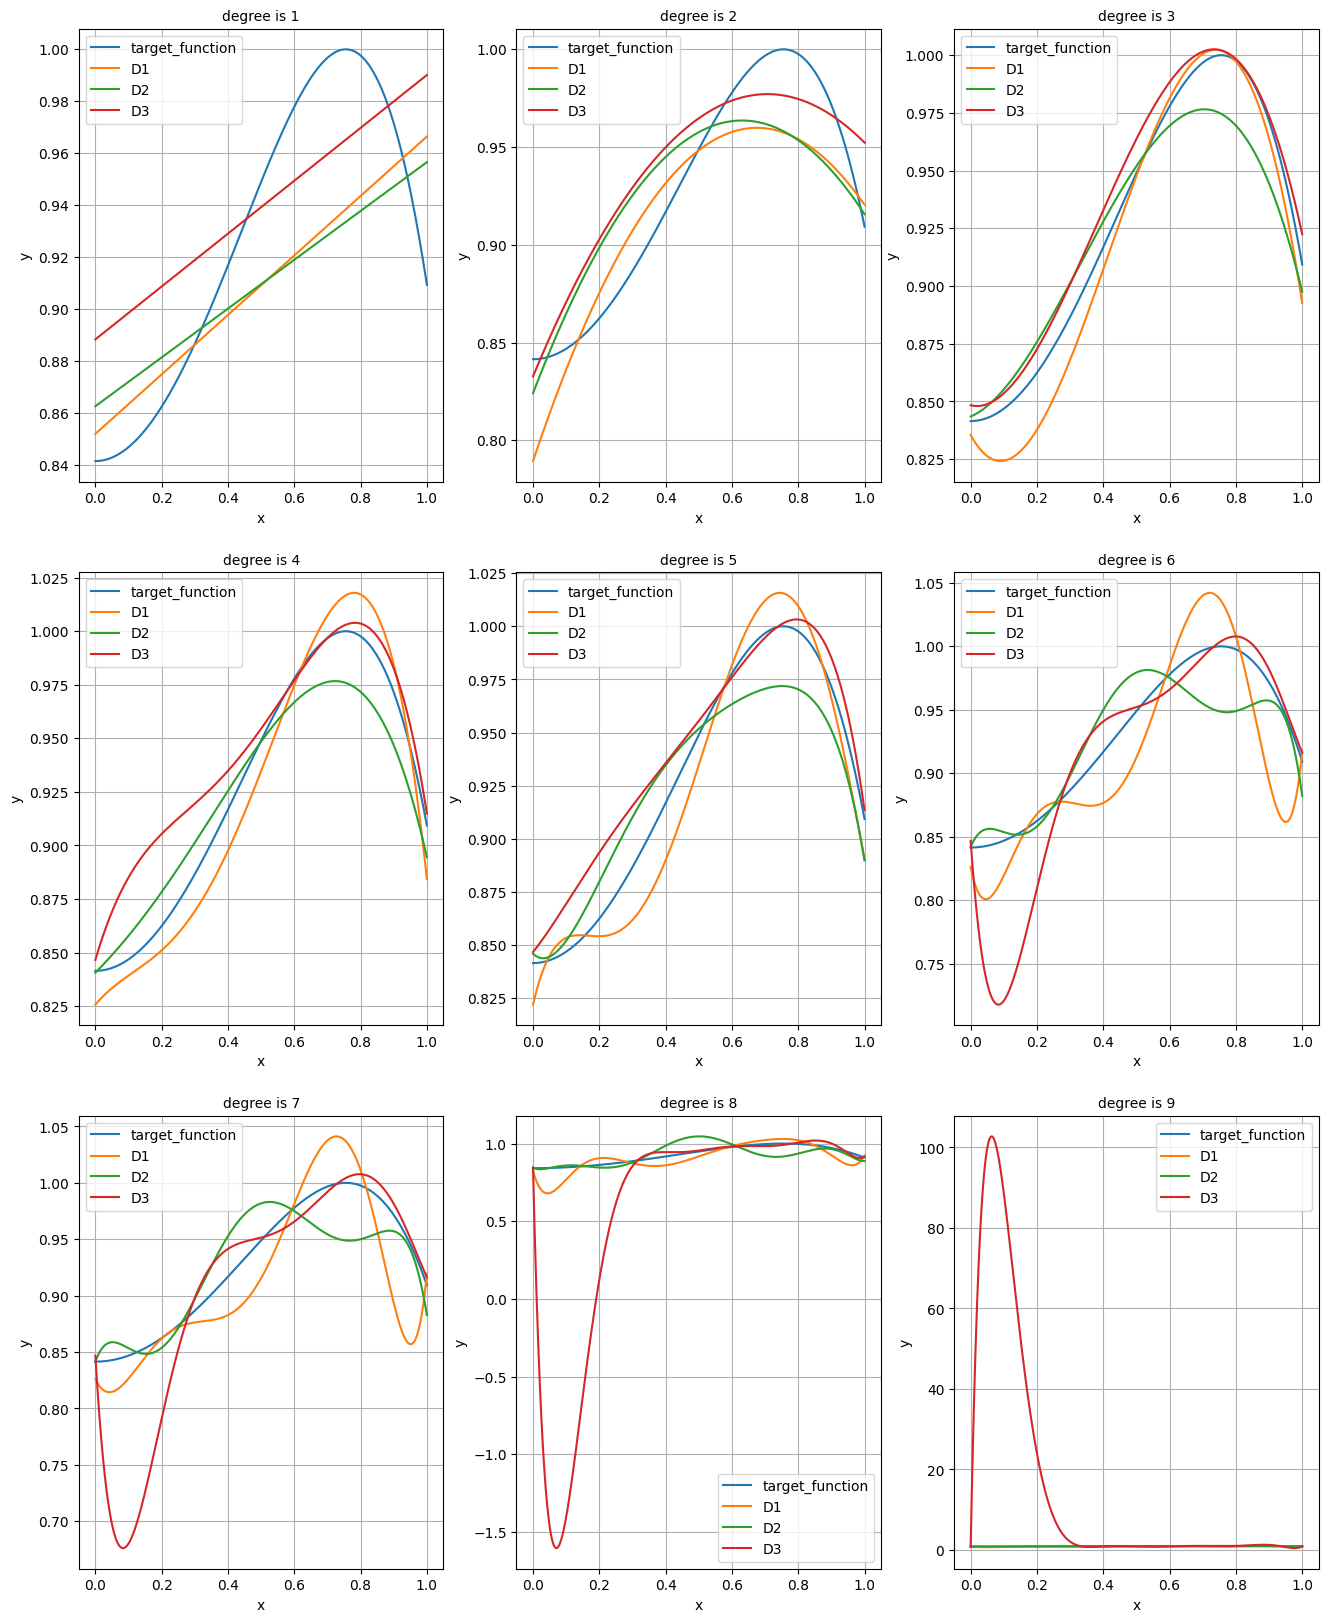

In [12]:
### plot figures
print("task: plot figures: ")
exp.plotFigures()

- class 3

In [13]:
class Experiment(Experiment):
  def __init__(self, __N: int, exp = None, astype = True):
    if(astype):
      # convert: mapping attributes from
      for att in vars(exp).keys():
        setattr(self, att, getattr(exp, att))
      return

    super().__init__(__N, None, False)

  def showReport(self):
    df = pd.DataFrame({'deg': [], 'e_in': [], 'e_out': []})
    for deg in range(1, 10):
      x_in, x_out, y_in, y_out = self.datas[0]
      mse_in = self.api.getMertric(x_in, self.models[deg][0], y_in)
      mse_out = self.api.getMertric(x_out, self.models[deg][0], y_out)
      df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)

    print(df)

    plt.plot(df.deg, df.e_in * 10**6, label = 'MSE_in')
    plt.plot(df.deg, df.e_out * 10**6, label = 'MSE_out')

    self.myplot('complexity (degree of polynomial)', 'MSE (1e-6)', 'E_in and E_out of D1')
    plt.show()

In [14]:
exp = Experiment(10, exp)

task: show report
   deg      e_in     e_out
0  1.0  0.002901  0.003458
1  2.0  0.001608  0.001646
2  3.0  0.000616  0.000879
3  4.0  0.000504  0.001011
4  5.0  0.000461  0.001259
5  6.0  0.000087  0.001381
6  7.0  0.000080  0.001196
7  8.0  0.000000  0.002224
8  9.0  0.000000  0.002232


<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, i

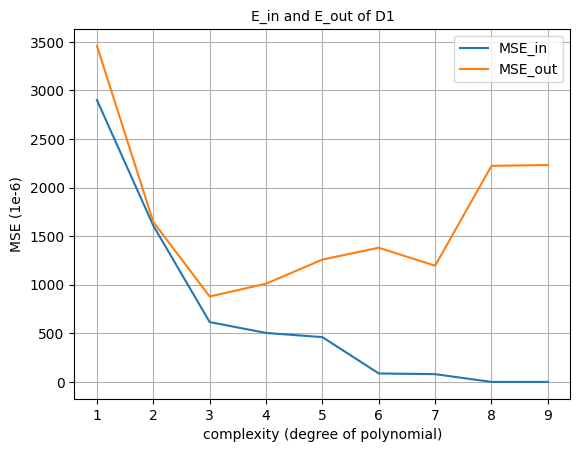

In [15]:
### show report
print("task: show report")
# plt.ylim(0, 0.006)
exp.showReport()

# sprint3: Encap into main-def

In [16]:
def main(N):
  exp = Experiment(N, None, astype = False)

  ### plot datas[0]
  x_in, x_out, y_in, y_out = exp.datas[0]
  plt.plot(exp.x_function, exp.y_function)
  plt.plot(x_in, y_in, 'o', label = 'in_samples')
  plt.plot(x_out, y_out, 'o', label = 'out_samples')

  exp.myplot('x', 'y', 'data')
  plt.show()

  ### fit models
  exp.fitModels()
  # exp.models

  ### plot figures
  print("task: plot figures: ")
  exp.plotFigures()

  ### show report
  print("task: show report")
  exp.showReport()

# sprint4: Experiment 2

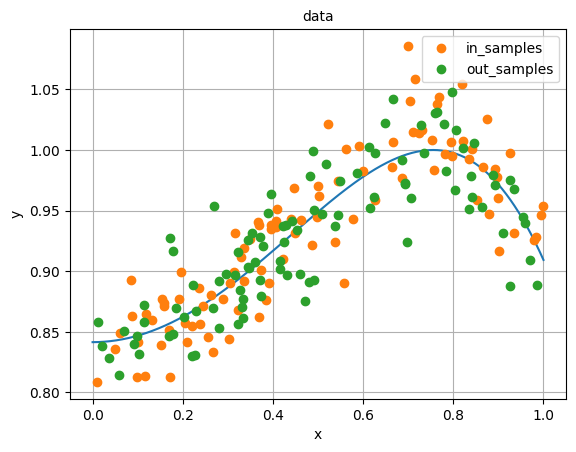

task: plot figures: 


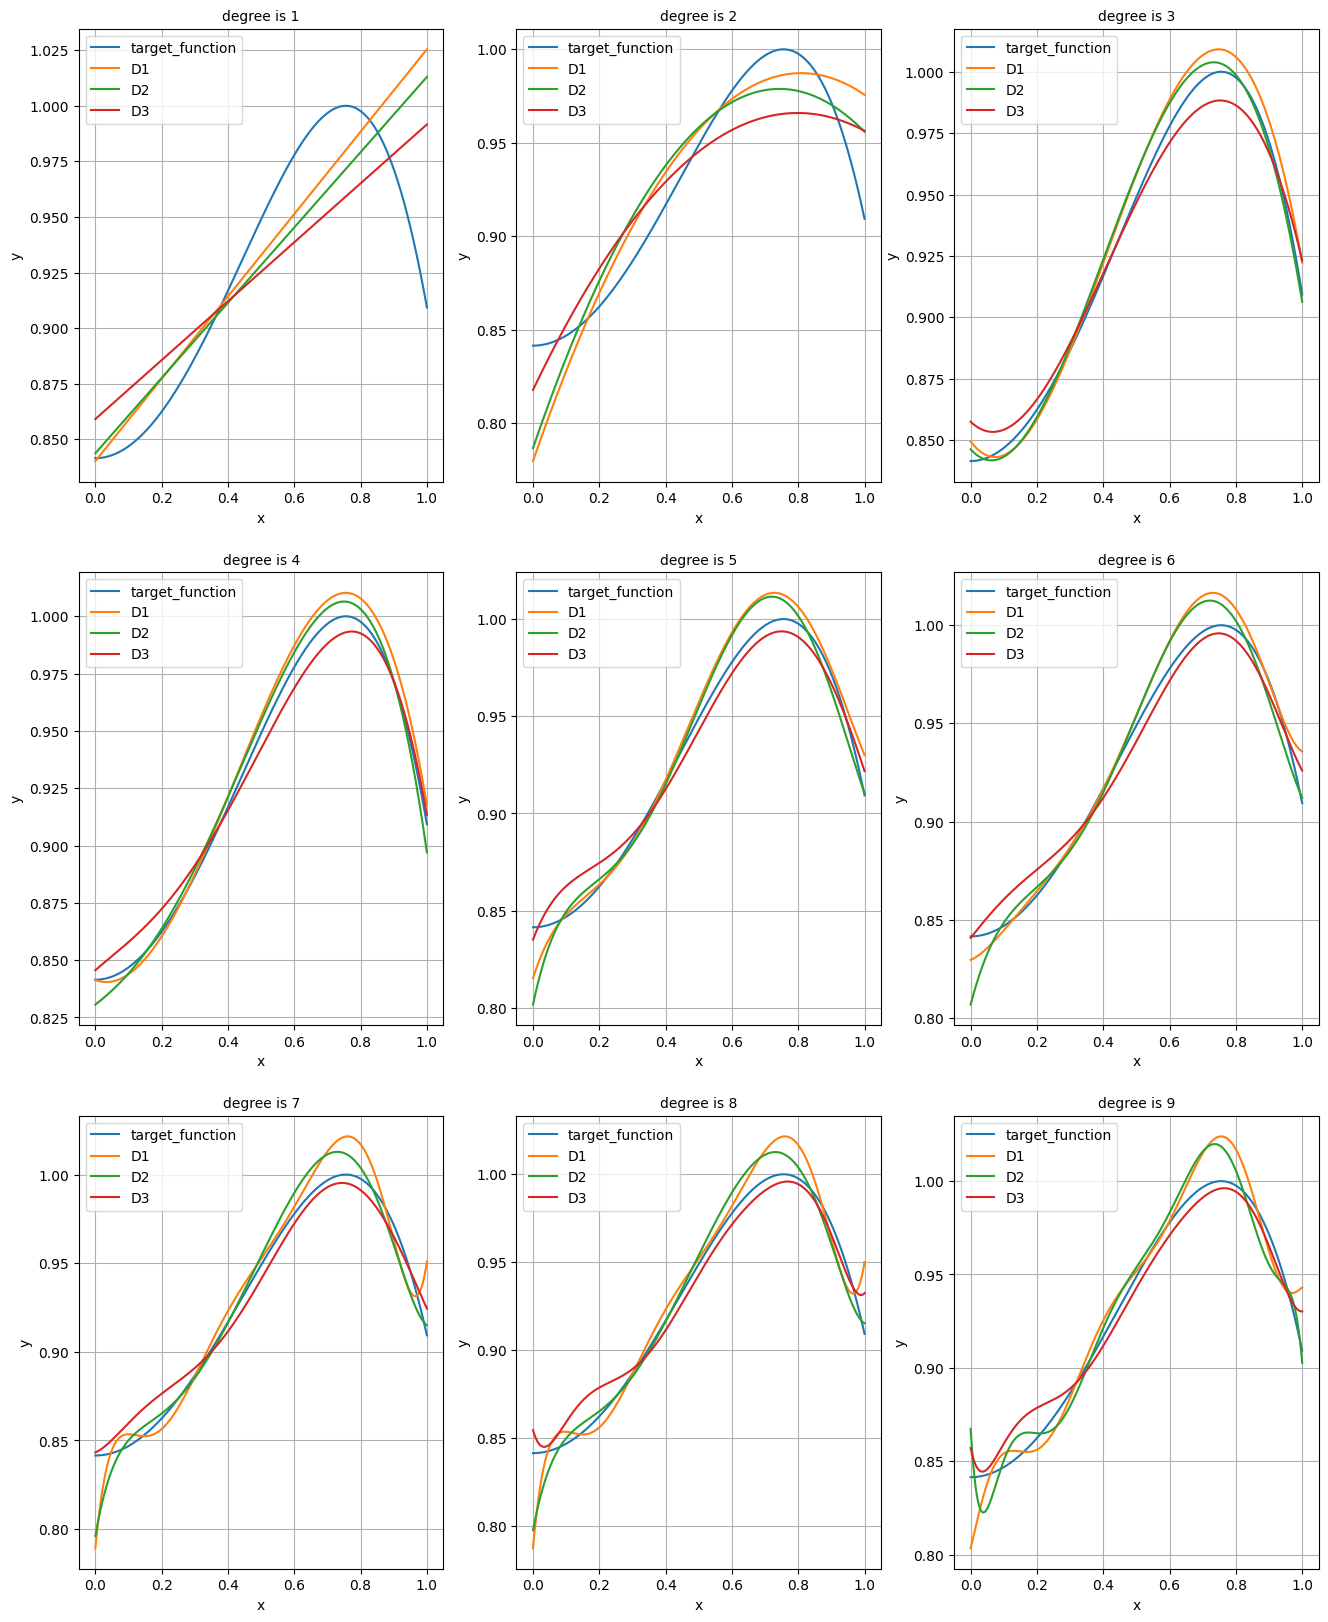

task: show report
   deg      e_in     e_out
0  1.0  0.001592  0.001587
1  2.0  0.001137  0.001285
2  3.0  0.000779  0.000948
3  4.0  0.000776  0.000935
4  5.0  0.000753  0.000939
5  6.0  0.000746  0.000923
6  7.0  0.000698  0.000949
7  8.0  0.000698  0.000951
8  9.0  0.000692  0.000952


<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, i

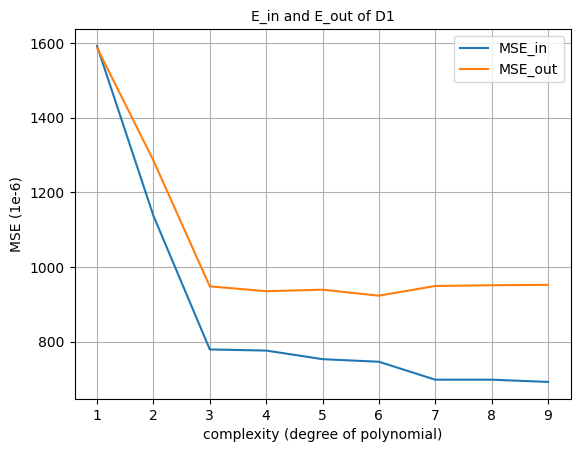

In [17]:
main(100)

# sprint5: Experiment 3

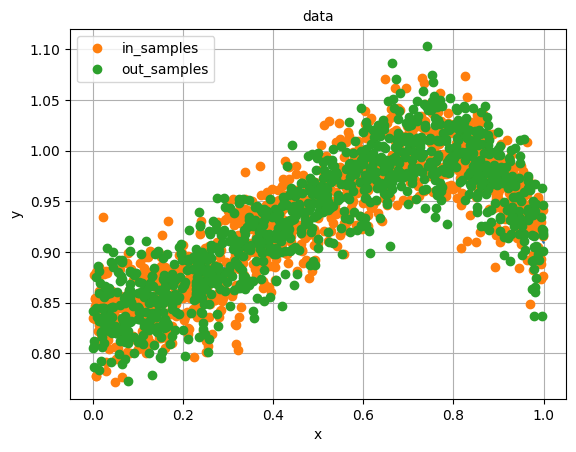

task: plot figures: 


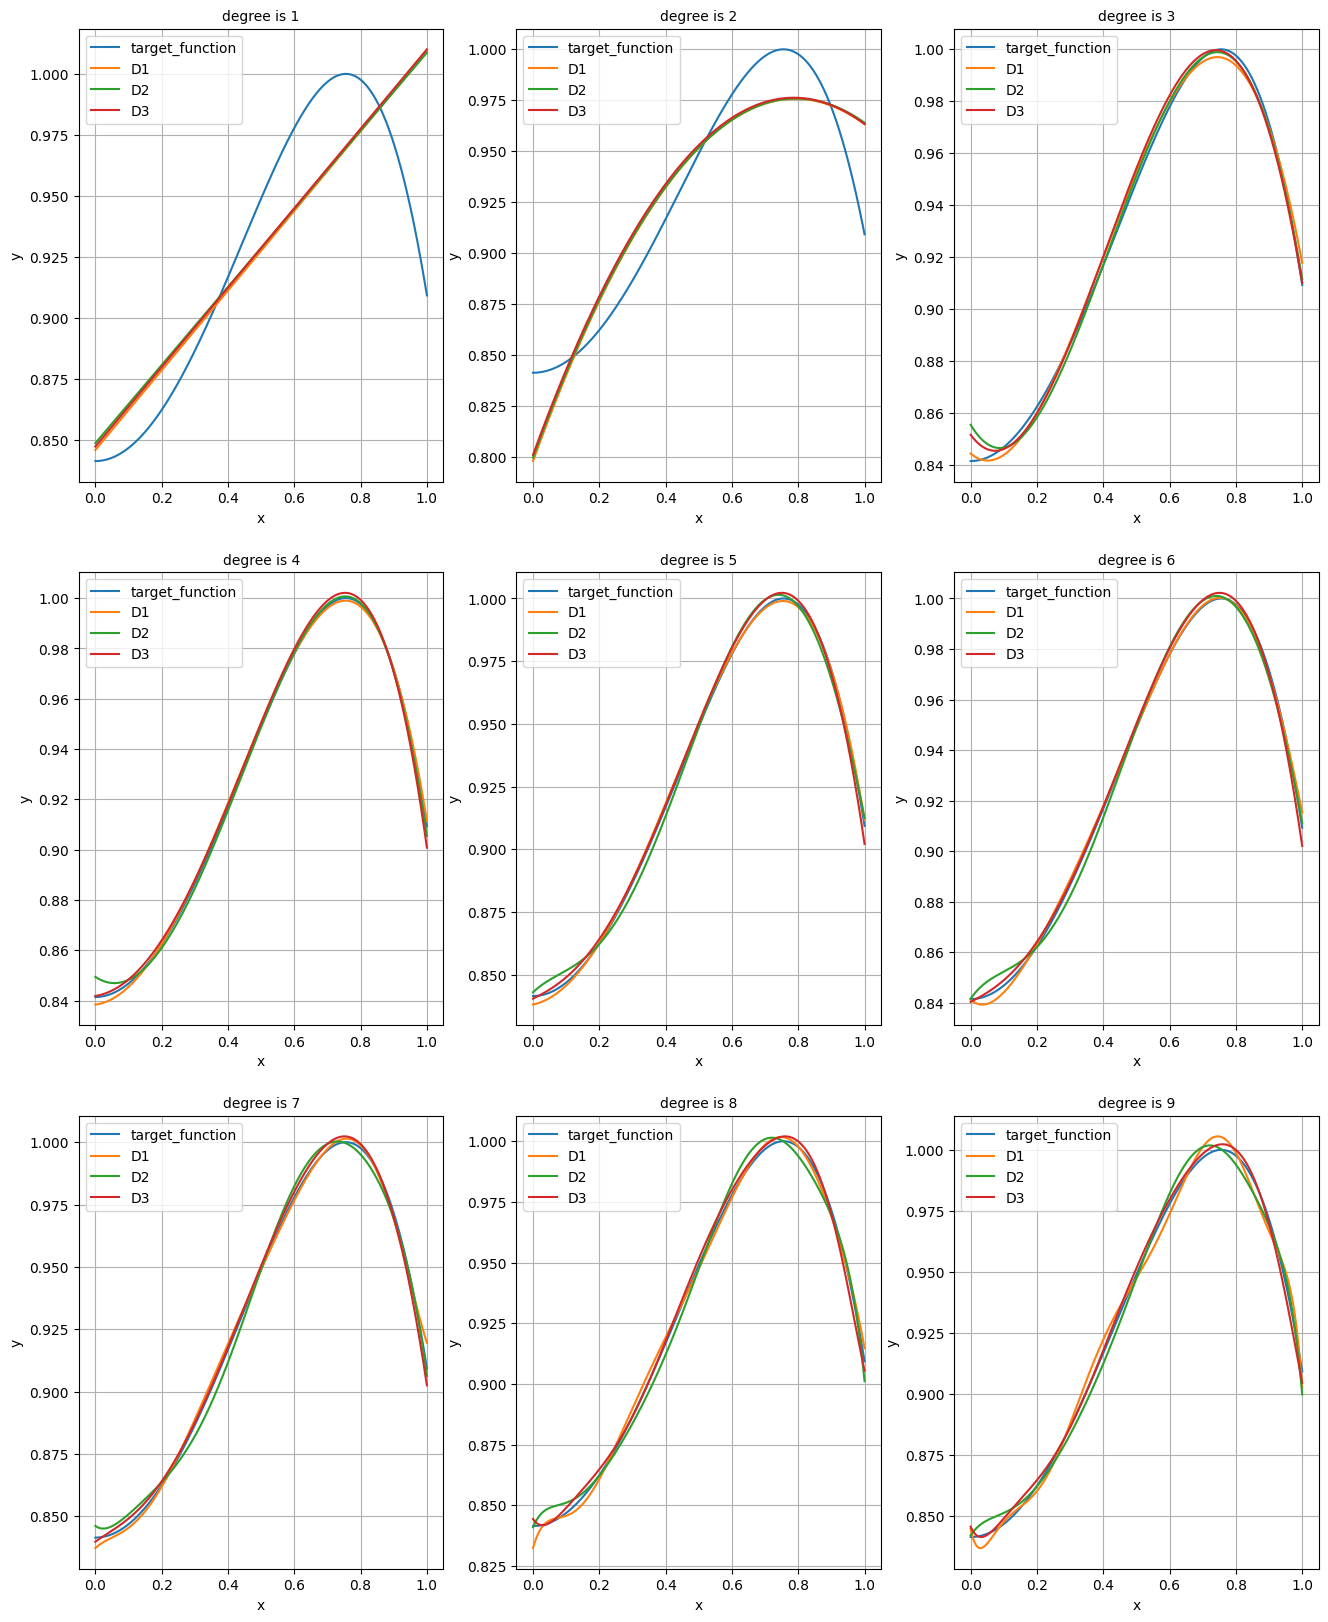

task: show report
   deg      e_in     e_out
0  1.0  0.001646  0.001750
1  2.0  0.001189  0.001256
2  3.0  0.000862  0.000890
3  4.0  0.000857  0.000878
4  5.0  0.000857  0.000878
5  6.0  0.000856  0.000877
6  7.0  0.000855  0.000876
7  8.0  0.000853  0.000875
8  9.0  0.000845  0.000891


<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, ignore_index = True)
<ipython-input-13-ed545850fce0>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'deg': deg, 'e_in': mse_in, 'e_out': mse_out}, i

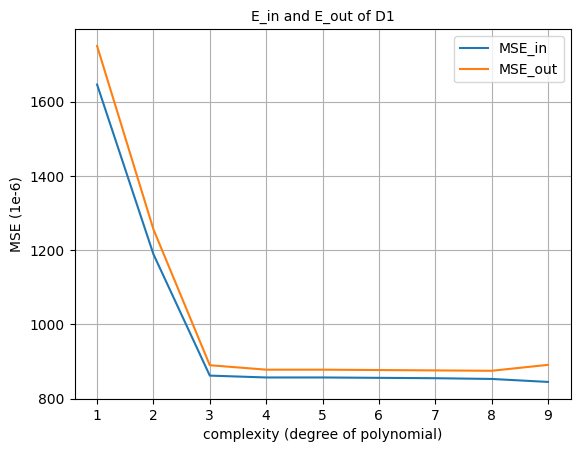

In [18]:
main(1000)

# sprint6: estimate Bias and Var

- Để có thể nhận xét về ảnh hưởng của **complexity** (độ phức tạp) và **size of sample** (kích thước của tập mẫu) đến **bias-variance**, ta thiết kế thí nghiệm như sau:

- Giả sử rằng ta đang quan tâm đến một đám đông - **populations**. Trong thực tế, đám đông có kích thước rất lớn nhưng ta giả sử rằng populations chỉ gồm một vài điểm dữ liệu (x, y) rằng *y = sin(1 + x^2)*.





- Với populations có được:
  - Ta phát sinh ra **tất cả** các **tập mẫu** có kích thước **size** có thể có
  - Với mỗi tập mẫu ta thực hiện fit_model với độ phức tạp **deg** xác định để có được **tất cả** các **model** có thể có sau khi fit
  - Dùng tất cả các model này để dự đoán cho một điểm dữ liệu (x, y) trong populations -> tính dự đoán trung bình cho một điểm dữ liệu này
  - -> tính bias và variance cho từng điểm dữ liệu rồi lấy mean.   

- class BiasVar phục vụ cho việc thực hiện thí nghiệm

In [19]:
class BiasVar:
  def __init__(self, n: int, fixed_state = RANDOM_STATE) -> None:
    self.fixed_state = fixed_state
    fixRandomState(self.fixed_state)
    self.api = API()
    self.n = n
    self.populations = np.array(self.api.generateData(NUMBER = self.n))
    self.x0 = self.populations[0]
    self.f_true = np.sin(1 + self.x0**2)
    self.populations[1] = self.f_true

  def fitPosibleModels(self, deg: int, size: int) -> None:
    self.models = []

    n = self.n
    populations = self.populations
    for mask in range(1, 2**n):
      cnt, indexing = 0, []
      for i in range(n):
        if((mask >> i) & 1):
          cnt += 1
          indexing.append(i)
      x_in, y_in = populations[0][indexing], populations[1][indexing]

      if(size != -1 and cnt != size):
        continue

      poly, reg = PolynomialFeatures(deg, include_bias=False), LinearRegression()
      layers = [poly, reg]
      layers = self.api.fitprop(x_in, layers, y_in)

      self.models.append(layers)
    self.models = np.array(self.models)

  def estimateBias(self, x0, f_true):
    y0 = []
    for layers in self.models:
      y0.append(self.api.forward(x0, layers))

    # print(y0)
    y0 = np.array(y0)
    # return round(np.mean(y0), 6)
    return round((np.mean(y0) - f_true)**2, 6)

  def estimateVar(self, x0):
    y0 = []
    for layers in self.models:
      y0.append(self.api.forward(x0, layers))

    # print(y0)
    y0 = np.array(y0)
    return round(np.var(y0), 6)


- compare bias and variance when changing complexit (deg)

note: x0 is: 
[0.79153447 0.52114798 0.27012522 0.13219595 0.54227725 0.97711446
 0.19960147]
note: f_true is: 
[0.99844746 0.95557227 0.87862147 0.85078421 0.96195351 0.92718989
 0.8623236 ]
note: fixed size is:  -1
   deg      bias       var
0    1  0.001240  0.001763
1    2  0.000798  0.003188
2    3  0.000470  0.002213
3    4  0.000399  0.002301
4    5  0.000303  0.002465
5    6  0.000259  0.003070
6    7  0.000183  0.003200
7    8  0.000140  0.003824
8    9  0.000130  0.003775


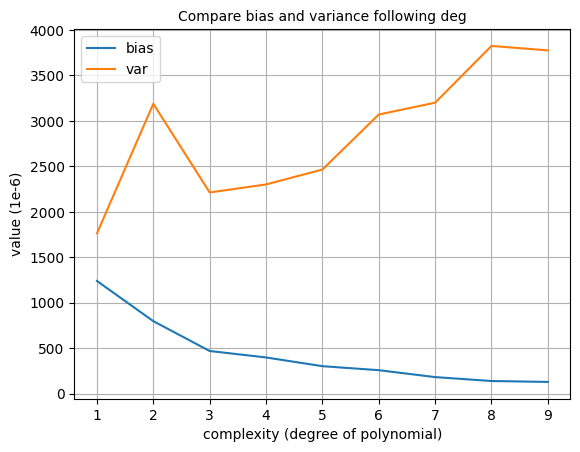

In [21]:
bv = BiasVar(7)
x0, f_true = bv.x0, bv.f_true
print("note: x0 is: ")
print(x0)
print("note: f_true is: ")
print(f_true)
size = -1
print("note: fixed size is: ", size)


biases, vares = [], []
for deg in range(1, 10):
  bv.fitPosibleModels(deg = deg, size = size)

  bias, var = [], []
  for i in range(len(x0)):
    bias.append(bv.estimateBias(x0[i], f_true[i]))
    var.append(bv.estimateVar(x0[i]))

  bias, var = round(np.mean(bias), 6), round(np.mean(var), 6)
  biases.append(bias)
  vares.append(var)


table = pd.DataFrame({'deg': range(1, 10), 'bias': biases, 'var': vares})
print(table)

plt.plot(table.deg, table['bias'] * 10**6, label = 'bias')
plt.plot(table.deg, table['var'] * 10**6, label = 'var')

bv.api.myplot('complexity (degree of polynomial)', 'value (1e-6)', 'Compare bias and variance following deg')
plt.show()

- Lưu ý:
  - Trong thí nghiệm này ta cố định size of sample là: {1, 2,.. , 7}
  - Ta thử dần từng deg từ 1 đến 9 và tính bias-variance trung bình cho từng deg

- **Nhận xét (trả lời câu hỏi)**:
  - Khi tăng độ phức tạp **complexity** của mô hình thì **bias** có xu hướng **giảm**
  - Khi tăng độ phức tạp **complexity** của mô hình thì **variance** có xu hướng **tăng**
  - Mô hình càng phức tạp thì bias càng có xu hướng giảm nhưng lại có xu hướng làm tăng variance. Có nghĩa là sẽ có nhiều cơ hội hơn để xấp xỉ hàm f_true nhưng accuracy của mô hình sẽ phụ thuộc rất nhiều vào tập mẫu được thu thập để huấn luyện mô hình.

- compare bias and variance when changing size of samples

note: x0 is: 
[0.79153447 0.52114798 0.27012522 0.13219595 0.54227725 0.97711446
 0.19960147 0.3721199  0.72901993 0.85591779 0.26041312 0.76692999
 0.71818043 0.96797542 0.99692338]
note: f_true is: 
[0.99844746 0.95557227 0.87862147 0.85078421 0.96195351 0.92718989
 0.8623236  0.90799486 0.99922682 0.98693908 0.87614934 0.99984888
 0.99848716 0.93370188 0.91183696]
note: fixed deg is:  1
    size      bias       var
0      3  0.002123  0.004614
1      4  0.001712  0.002535
2      5  0.001590  0.001438
3      6  0.001550  0.000844
4      7  0.001535  0.000523
5      8  0.001529  0.000343
6      9  0.001526  0.000234
7     10  0.001524  0.000163
8     11  0.001524  0.000112
9     12  0.001523  0.000074
10    13  0.001523  0.000044
11    14  0.001523  0.000020
12    15  0.001523  0.000000


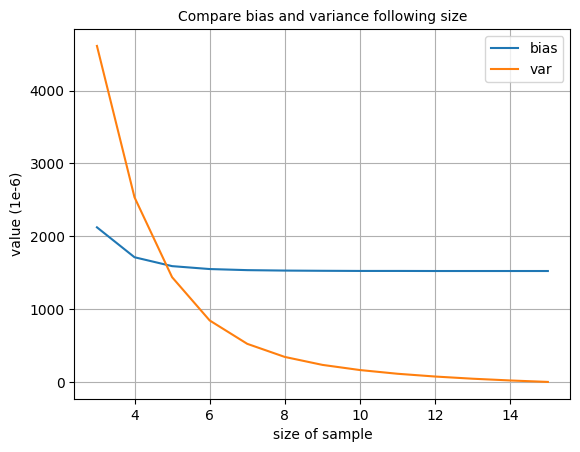

In [22]:
bv = BiasVar(15)
x0, f_true = bv.x0, bv.f_true
print("note: x0 is: ")
print(x0)
print("note: f_true is: ")
print(f_true)
deg, begin_size = 1, 3
print("note: fixed deg is: ", deg)

biases, vares = [], []
for size in range(begin_size, bv.n+1):
  bv.fitPosibleModels(deg = deg, size = size)

  bias, var = [], []
  for i in range(len(x0)):
    bias.append(bv.estimateBias(x0[i], f_true[i]))
    var.append(bv.estimateVar(x0[i]))

  bias, var = round(np.mean(bias), 6), round(np.mean(var), 6)
  biases.append(bias)
  vares.append(var)


table = pd.DataFrame({'size': range(begin_size, bv.n+1), 'bias': biases, 'var': vares})
print(table)

plt.plot(table['size'], table['bias'] * 10**6, label = 'bias')
plt.plot(table['size'], table['var'] * 10**6, label = 'var')

bv.api.myplot('size of sample', 'value (1e-6)', 'Compare bias and variance following size')
plt.show()

- Lưu ý:
  - Trong thí nghiệm này ta cố định deg bằng 1 (hàm bậc nhất)
  - Thử thay đổi size of sample của tập mẫu rồi tính bias-variance cho từng size

- **Nhận xét (trả lời câu hỏi)**:
  - Kích thước tập mẫu **size of sample** **không ảnh hưởng** đến **bias**
  - Khi tăng kích thước tập mẫu **size of sample** làm **giảm** **variance**  
  - Điều này có nghĩa là tăng số lượng điểm dữ liệu cho tập huấn luyện không làm cho mô hình xấp xỉ tốt hơn hàm f_true mà chỉ làm cho nguy cơ bị overfitting của mô hình giảm đi (tránh việc mô hình quá phụ thuộc vào tập dữ liệu được thu thập cho việc huấn luyện). Vì vậy việc tăng số lượng điểm dữ liệu cho tập mẫu luôn được khuyến khích.

- Mở rộng:
  - Trong đồ thị trên ta thấy rằng bias vẫn giảm nhẹ khi tăng size nhưng nguyên nhân là do với mỗi tập mẫu được chọn làm tập huấn luyện ta chưa thể thu được **tất cả các mô hình** tối ưu tương ứng với tập mẫu đó mà chỉ thu được 1 mô hình tối ưu duy nhất (Ví dụ với 1 điểm dữ liệu thì có vô số các đường thẳng có thể fit hoàn hảo với điểm dữ liệu này). Hơn nữa, quy mô của thí nghiệm chỉ mang tính chất minh họa trực quan hơn.
  - Tuy nhiên, khi số lượng dữ liệu tăng dần ta thấy đồ thị của bias có xu hướng duỗi ra thành 1 đường thẳng nằm ngang (hằng số cố định).

In [1]:
print("Hoang Ngoc Quan, MSSV: 22521178")
print("Thank you!!!")

Hoang Ngoc Quan, MSSV: 22521178
Thank you!!!
